In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("C:\\Users\\gouth\\Downloads\\ElectricBill.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,BILL,FILAMENT BULBS,CFL BULBS,LED BULBS,FANS,TV,MIXEY,INDUCTION COOKER,GRINDER,WASHING MACHINE,FRIDGE,WIFI MODEM,WELL MOTOR,BOREWELL MOTOR
0,2010-01-01,119.0166,7,2,1,3,1,1,0,0,0,0,0,1,0
1,2010-02-01,110.5330,7,2,1,3,1,1,0,0,0,0,0,1,0
2,2010-03-01,98.2672,7,2,1,3,1,1,0,0,0,0,0,1,0
3,2010-04-01,100.3000,7,2,1,3,1,1,0,0,0,0,0,1,0
4,2010-05-01,96.8364,7,2,1,3,1,1,0,0,0,0,0,1,0


In [4]:
df.shape

(165, 15)

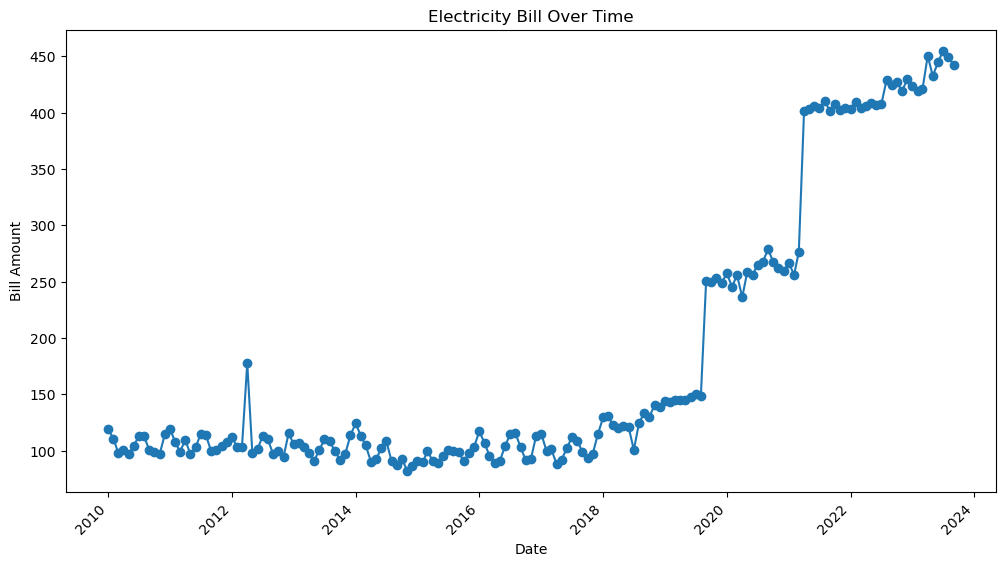

In [5]:
# Plotting time series
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['BILL'], marker='o')
plt.title('Electricity Bill Over Time')
plt.xlabel('Date')
plt.ylabel('Bill Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
correlation_df = df.drop(['MIXEY', 'WELL MOTOR'], axis=1)

C:\Users\gouth\AppData\Local\Temp\ipykernel_23952\1498041189.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


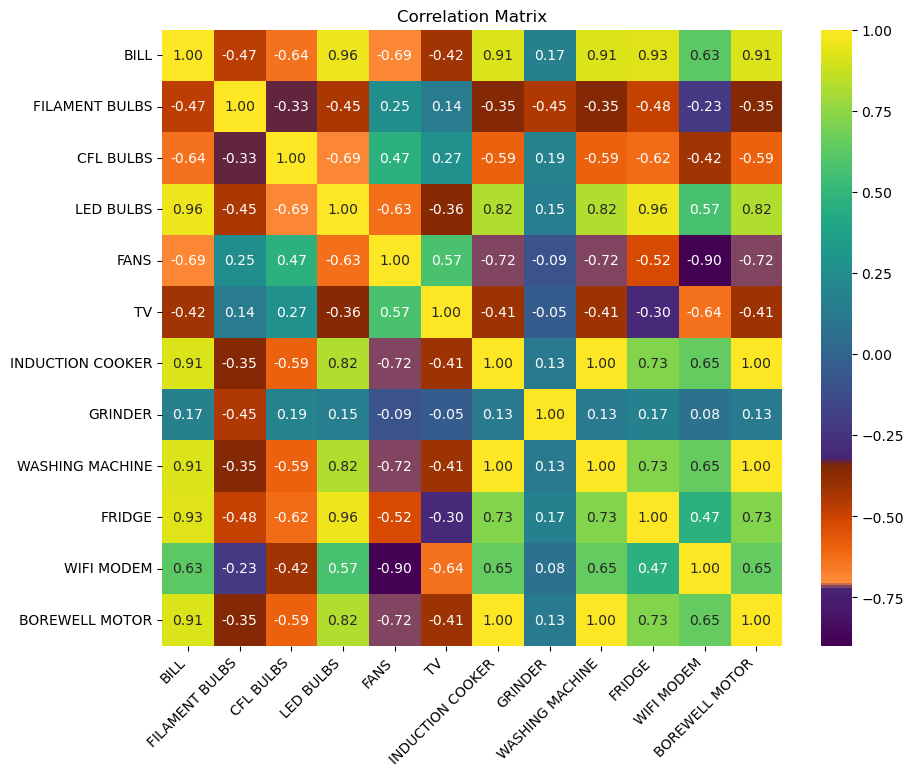

In [45]:
correlation_matrix = correlation_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap=mymap,  fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
appliance_columns = ['FILAMENT BULBS', 'CFL BULBS', 'LED BULBS', 'FANS', 'TV', 'MIXEY', 'INDUCTION COOKER',
                      'GRINDER', 'WASHING MACHINE', 'FRIDGE', 'WIFI MODEM', 'WELL MOTOR', 'BOREWELL MOTOR']
# Summary statistics for each appliance
appliance_stats = df[appliance_columns].describe()
appliance_stats

,FILAMENT BULBS,CFL BULBS,LED BULBS,FANS,TV,MIXEY,INDUCTION COOKER,GRINDER,WASHING MACHINE,FRIDGE,WIFI MODEM,WELL MOTOR,BOREWELL MOTOR
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.000000
mean,2.157576,4.121212,2.860606,2.896970,0.963636,1.0,0.181818,0.933333,0.181818,0.296970,0.084848,1.0,0.181818
std,2.902798,3.005661,3.314596,0.304924,0.187763,0.0,0.386869,0.250203,0.386869,0.458314,0.279504,0.0,0.386869
min,0.000000,0.000000,0.000000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,2.000000,1.000000,3.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
50%,0.000000,3.000000,1.000000,3.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
75%,5.000000,8.000000,6.000000,3.000000,1.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000
max,7.000000,8.000000,9.000000,3.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [9]:
total_bill = df['BILL']
correlations = df[appliance_columns].corrwith(total_bill)

#  correlation values
print("Correlation with Total Bill:")
correlations

Correlation with Total Bill:


FILAMENT BULBS     -0.470728
CFL BULBS          -0.635894
LED BULBS           0.962160
FANS               -0.685006
TV                 -0.419484
MIXEY                    NaN
INDUCTION COOKER    0.912621
GRINDER             0.168977
WASHING MACHINE     0.912621
FRIDGE              0.928376
WIFI MODEM          0.626704
WELL MOTOR               NaN
BOREWELL MOTOR      0.912621
dtype: float64

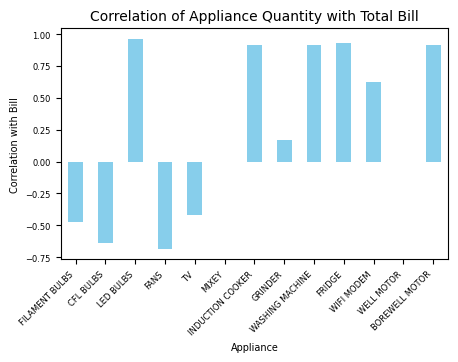

In [18]:
# Plotting the correlation values
plt.figure(figsize=(5, 3))
correlations.plot(kind='bar', color='skyblue', fontsize=6)
plt.title('Correlation of Appliance Quantity with Total Bill',fontsize=10)
plt.xlabel('Appliance',fontsize=7)
plt.ylabel('Correlation with Bill',fontsize=7)
plt.xticks(rotation=45, ha='right')
plt.show()

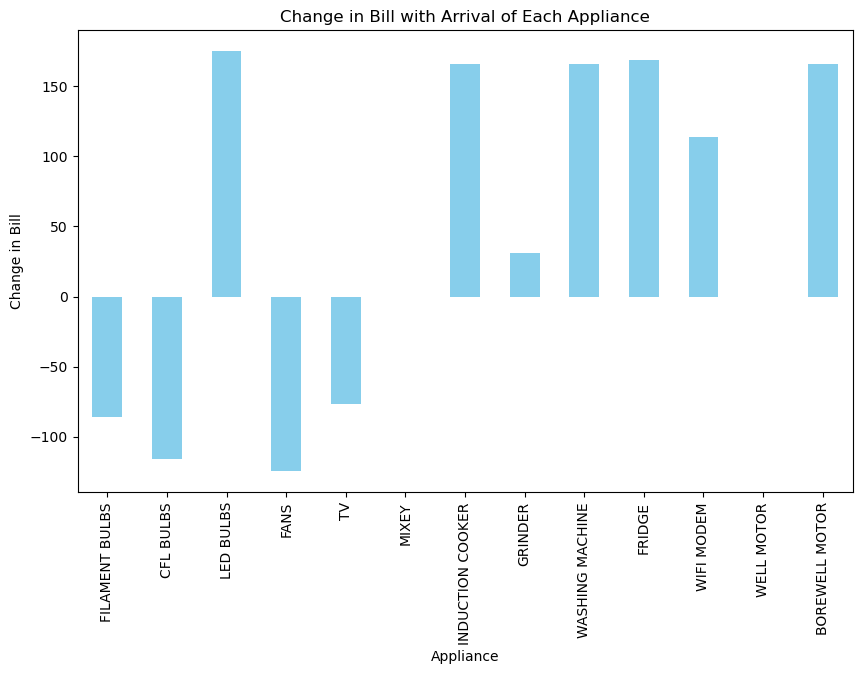

In [12]:
change_in_bill = correlations * df['BILL'].mean()
plt.figure(figsize=(10, 6))
change_in_bill.plot(kind='bar', color='skyblue')
plt.title('Change in Bill with Arrival of Each Appliance')
plt.xlabel('Appliance')
plt.ylabel('Change in Bill')
plt.show()

In [26]:
df['Total Appliances'] = df[appliance_columns].sum(axis=1)

df['Average Appliances'] = df[appliance_columns].mean(axis=1)

df['Year'] = df['DATE'].dt.year
average_appliance_over_time = df.groupby('Year')[appliance_columns].mean().astype(int)

total_over_time = df.groupby('Year')['Total Appliances'].sum().astype(int)

average_appliance_over_time

,FILAMENT BULBS,CFL BULBS,LED BULBS,FANS,TV,MIXEY,INDUCTION COOKER,GRINDER,WASHING MACHINE,FRIDGE,WIFI MODEM,WELL MOTOR,BOREWELL MOTOR
Year,,,,,,,,,,,,,
2010,7,2,1,3,1,1,0,0,0,0,0,1,0
2011,6,2,1,3,1,1,0,1,0,0,0,1,0
2012,6,3,1,3,1,1,0,1,0,0,0,1,0
2013,5,3,1,3,1,1,0,1,0,0,0,1,0
2014,5,3,0,3,1,1,0,1,0,0,0,1,0
2015,0,8,0,3,1,1,0,1,0,0,0,1,0
2016,0,8,0,3,1,1,0,1,0,0,0,1,0
2017,0,8,1,3,1,1,0,1,0,0,0,1,0
2018,0,8,1,3,1,1,0,1,0,0,0,1,0


In [27]:
total_over_time

Year
2010    193
2011    204
2012    204
2013    195
2014    192
2015    180
2016    190
2017    192
2018    192
2019    194
2020    204
2021    231
2022    237
2023    174
Name: Total Appliances, dtype: int32

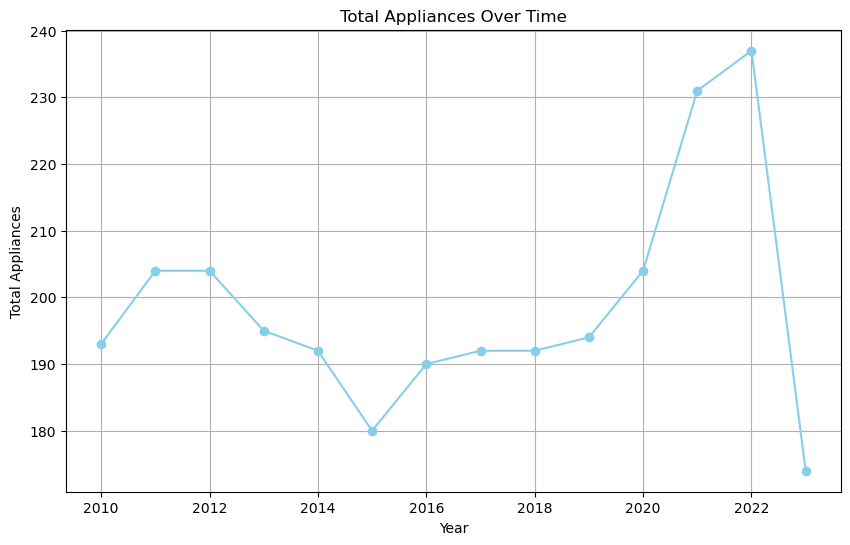

In [28]:
plt.figure(figsize=(10, 6))
total_over_time.plot(marker='o', color='skyblue')
plt.title('Total Appliances Over Time')
plt.xlabel('Year')
plt.ylabel('Total Appliances')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

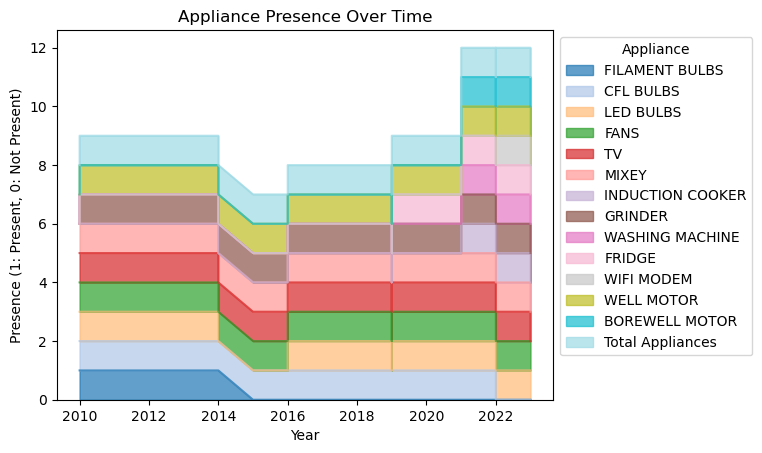

In [29]:
appliance_presence = df.set_index('Year').iloc[:, 2:-1]  # Exclude non-appliance columns

# Replace non-zero values with 1 to indicate presence
appliance_presence = (appliance_presence > 0).astype(int)

# Create a stacked area chart
plt.figure(figsize=(10, 6))
appliance_presence.plot(kind='area', stacked=True, colormap='tab20', alpha=0.7)
plt.title('Appliance Presence Over Time')
plt.xlabel('Year')
plt.ylabel('Presence (1: Present, 0: Not Present)')
plt.legend(title='Appliance', bbox_to_anchor=(1, 1))
plt.show()

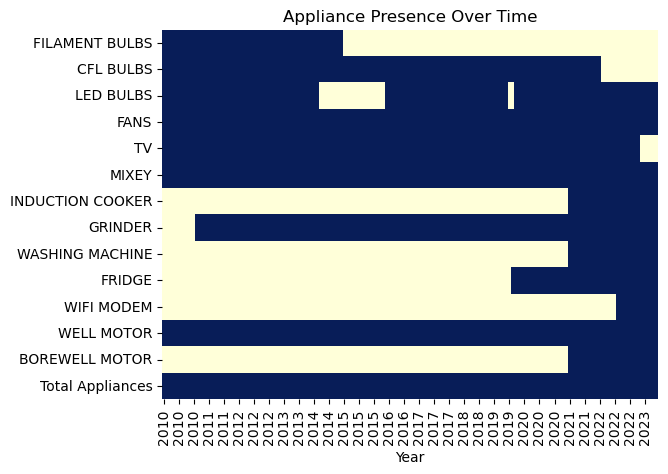

In [59]:
appliance_presence = df.set_index('Year').iloc[:, 2:-1]  # Exclude non-appliance columns

appliance_presence = (appliance_presence > 0).astype(int)

import matplotlib.colors as colors

sns.heatmap(appliance_presence.T, cmap='YlGnBu', edgecolors='black',hatch='xx',antialiased=True,  cbar=False)
plt.title('Appliance Presence Over Time')
plt.show()